## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [26]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv("../Zillow_Austin_11-16-22.csv")

## Show Top 5 Records

In [4]:
df.head()

,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,badgeInfo,pgapt,sgapt,zestimate,info3String,brokerName
0,445000,445000,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,Austin,TX,78735,3.0,3.0,1802.0,30.269207,-97.86206,False,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",NaN,ForSale,For Sale (Broker),1189900,https://photos.zillowstatic.com/fp/98ab7c7b289...,Realty Austin
1,1995000,1995000,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,Austin,TX,78757,4.0,4.0,3443.0,30.333755,-97.73414,False,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",NaN,ForSale,New Construction,2154600,https://photos.zillowstatic.com/fp/98ab7c7b289...,Jimmy Gilmore & Co
2,929900,929900,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,Austin,TX,78704,2.0,2.0,1318.0,30.252070,-97.76860,False,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",NaN,ForSale,For Sale (Broker),1048700,https://photos.zillowstatic.com/fp/98ab7c7b289...,Keller Williams Realty
3,6495000,6495000,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,Austin,TX,78703,5.0,6.0,5000.0,30.290514,-97.75361,False,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",NaN,ForSale,For Sale (Broker),6553400,https://photos.zillowstatic.com/fp/98ab7c7b289...,Douglas Elliman Real Estate
4,365000,365000,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,Austin,TX,78754,4.0,2.0,2127.0,30.355240,-97.61292,False,"{'type': '3D_HOME', 'text': '3D Tour'}",NaN,ForSale,For Sale (Broker),421000,https://photos.zillowstatic.com/fp/98ab7c7b289...,Orchard Brokerage


## Preparing The Data and Dealing With The Missing Values

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['price', 'unformattedPrice', 'addressZipcode', 'beds', 'baths', 'area', 'latitude', 'longitude', 'isZillowOwned', 'badgeInfo', 'zestimate']

We have 9 categorical features : ['address', 'addressStreet', 'addressCity', 'addressState', 'variableData', 'pgapt', 'sgapt', 'info3String', 'brokerName']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             800 non-null    int64  
 1   unformattedPrice  800 non-null    int64  
 2   address           800 non-null    object 
 3   addressStreet     800 non-null    object 
 4   addressCity       800 non-null    object 
 5   addressState      800 non-null    object 
 6   addressZipcode    800 non-null    int64  
 7   beds              785 non-null    float64
 8   baths             799 non-null    float64
 9   area              796 non-null    float64
 10  latitude          786 non-null    float64
 11  longitude         786 non-null    float64
 12  isZillowOwned     800 non-null    bool   
 13  variableData      800 non-null    object 
 14  badgeInfo         0 non-null      float64
 15  pgapt             800 non-null    object 
 16  sgapt             800 non-null    object 
 1

### Dealing With The Missing Values
- By dropping 'badgeInfo' column because it has no values
- By dropping 'unformattedPrice' because it has the same value as price
- By filling the missing categorical values with their modes
- By filling the numcial missing values with the means

In [9]:
housing = df
[housing[cat] == housing[cat].fillna(housing[cat].mode()[0],inplace=True) for cat in categorical_features  ]
[housing[num] == housing[num].fillna(housing[num].mean(),inplace=True) for num in numeric_features  ]
housing = housing.drop(['badgeInfo'], axis=1)
housing = housing.drop(['unformattedPrice'], axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           800 non-null    int64  
 1   address         800 non-null    object 
 2   addressStreet   800 non-null    object 
 3   addressCity     800 non-null    object 
 4   addressState    800 non-null    object 
 5   addressZipcode  800 non-null    int64  
 6   beds            800 non-null    float64
 7   baths           800 non-null    float64
 8   area            800 non-null    float64
 9   latitude        800 non-null    float64
 10  longitude       800 non-null    float64
 11  isZillowOwned   800 non-null    bool   
 12  variableData    800 non-null    object 
 13  pgapt           800 non-null    object 
 14  sgapt           800 non-null    object 
 15  zestimate       800 non-null    int64  
 16  info3String     800 non-null    object 
 17  brokerName      800 non-null    obj

### Preparing X and Y Variables

In [10]:
X = housing.drop(columns=['price'], axis=1)
X.head()

,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,pgapt,sgapt,zestimate,info3String,brokerName
0,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,Austin,TX,78735,3.0,3.0,1802.0,30.269207,-97.86206,False,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",ForSale,For Sale (Broker),1189900,https://photos.zillowstatic.com/fp/98ab7c7b289...,Realty Austin
1,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,Austin,TX,78757,4.0,4.0,3443.0,30.333755,-97.73414,False,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",ForSale,New Construction,2154600,https://photos.zillowstatic.com/fp/98ab7c7b289...,Jimmy Gilmore & Co
2,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,Austin,TX,78704,2.0,2.0,1318.0,30.252070,-97.76860,False,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",ForSale,For Sale (Broker),1048700,https://photos.zillowstatic.com/fp/98ab7c7b289...,Keller Williams Realty
3,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,Austin,TX,78703,5.0,6.0,5000.0,30.290514,-97.75361,False,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",ForSale,For Sale (Broker),6553400,https://photos.zillowstatic.com/fp/98ab7c7b289...,Douglas Elliman Real Estate
4,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,Austin,TX,78754,4.0,2.0,2127.0,30.355240,-97.61292,False,"{'type': '3D_HOME', 'text': '3D Tour'}",ForSale,For Sale (Broker),421000,https://photos.zillowstatic.com/fp/98ab7c7b289...,Orchard Brokerage


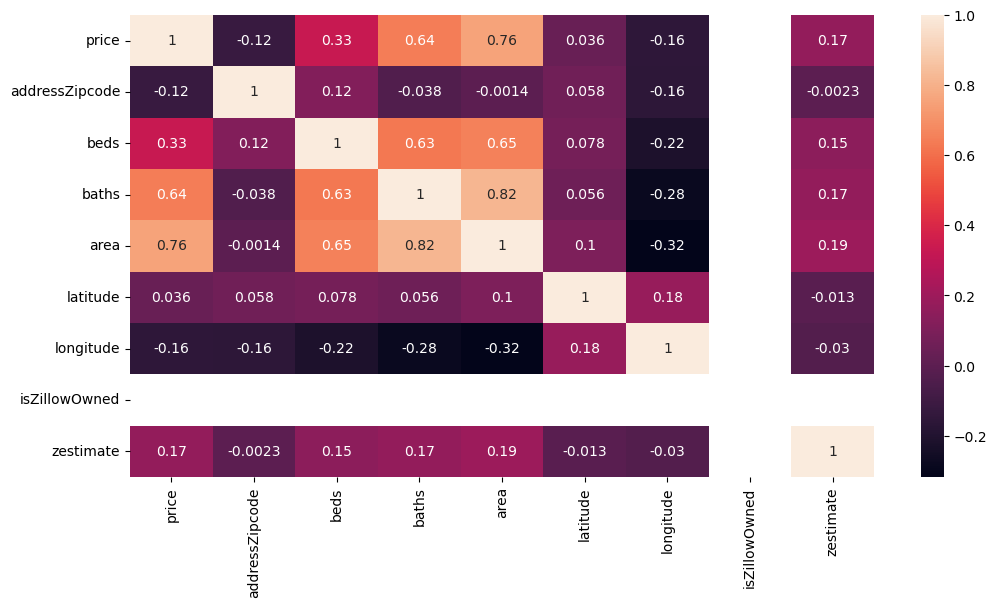

In [30]:
data_corr = housing.corr()

plt.figure(figsize=(12,6))
sns.heatmap(data_corr, annot=True);

In [11]:
y = housing['price']
y

0        445000
1       1995000
2        929900
3       6495000
4        365000
         ...   
795     9990000
796    11250800
797    13000000
798    13500000
799    18000000
Name: price, Length: 800, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(800, 2244)

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((640, 2244), (160, 2244))

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(normalize=True, tol=1e-2),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n');

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 53.5864
- Mean Absolute Error: 38.0885
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 978115.0035
- Mean Absolute Error: 540008.3177
- R2 Score: 0.6944


Lasso
Model performance for Training set
- Root Mean Squared Error: 599.1923
- Mean Absolute Error: 554.4053
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1775574.1299
- Mean Absolute Error: 795966.7265
- R2 Score: -0.0071


Ridge
Model performance for Training set
- Root Mean Squared Error: 214386.8258
- Mean Absolute Error: 119800.7266
- R2 Score: 0.9763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 972457.8727
- Mean Absolute Error: 536667.2797
- R2 Score: 0.6979


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 643999.8243
- Mean Absolute Err

### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.744880
7,CatBoosting Regressor,0.702737
2,Ridge,0.697924
0,Linear Regression,0.694399
5,Random Forest Regressor,0.670259
8,AdaBoost Regressor,0.599060
6,XGBRegressor,0.595675
4,Decision Tree,0.377062
1,Lasso,0.118237


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 69.44


## Plot y_pred and y_test

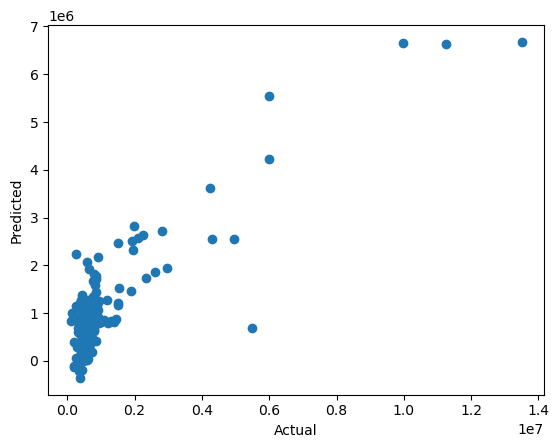

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

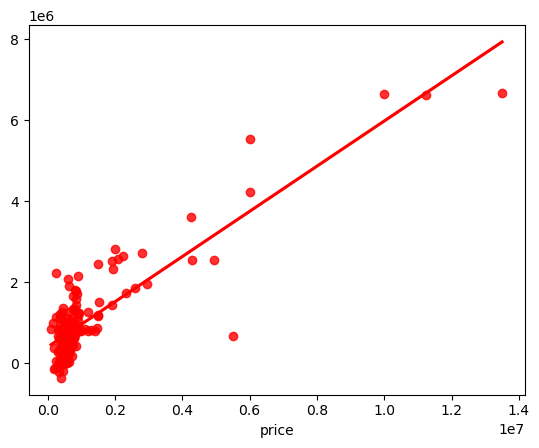

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
696,1199000,7.960145e+05,4.029855e+05
667,939000,1.245178e+06,-3.061782e+05
63,475000,1.713323e+05,3.036677e+05
533,650000,8.162102e+05,-1.662102e+05
66,299000,8.278079e+05,-5.288079e+05
...,...,...,...
589,749900,1.672318e+06,-9.224181e+05
798,13500000,6.675598e+06,6.824402e+06
744,1950000,2.326022e+06,-3.760218e+05
513,630000,6.126949e+05,1.730514e+04
